The objective of this code is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where
label ‘1’ denotes the tweet is racist/sexist and 
label ‘0’ denotes the tweet is not racist/sexist, 
your objective is to predict the labels on the given test dataset.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
train = pd.read_csv('/home/mona/Downloads/twitter-sentiment/train_tweet.csv')
test = pd.read_csv('/home/mona/Downloads/twitter-sentiment/test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [4]:
train.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [4]:
test.head()

id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...

In [5]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [6]:
# checking out the positive comments from the train set

train[train['label'] == 0].head(10)

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
5   6      0  [2/2] huge fan fare and big talking before the...
6   7      0   @user camping tomorrow @user @user @user @use...
7   8      0  the next school year is the year for exams.ð...
8   9      0  we won!!! love the land!!! #allin #cavs #champ...
9  10      0   @user @user welcome here !  i'm   it's so #gr...

In [7]:
# checking out the negative comments from the train set 

train[train['label'] == 1].head(10)

id  label                                              tweet
13    14      1  @user #cnn calls #michigan middle school 'buil...
14    15      1  no comment!  in #australia   #opkillingbay #se...
17    18      1                             retweet if you agree! 
23    24      1    @user @user lumpy says i am a . prove it lumpy.
34    35      1  it's unbelievable that in the 21st century we'...
56    57      1            @user lets fight against  #love #peace 
68    69      1  ð©the white establishment can't have blk fol...
77    78      1  @user hey, white people: you can call people '...
82    83      1  how the #altright uses  &amp; insecurity to lu...
111  112      1  @user i'm not interested in a #linguistics tha...

we will explore the cleaned tweets text. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights.

A few probable questions are as follows:

What are the most common words in the entire dataset?
What are the most common words in the dataset for negative and positive tweets, respectively?
How many hashtags are there in a tweet?
Which trends are associated with my dataset?
Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

<AxesSubplot:>

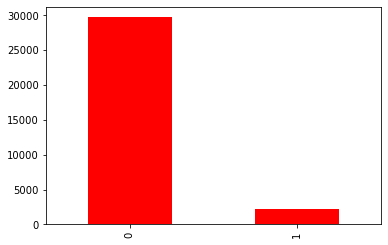

In [8]:
train['label'].value_counts().plot.bar(color = 'red', figsize = (6, 4))

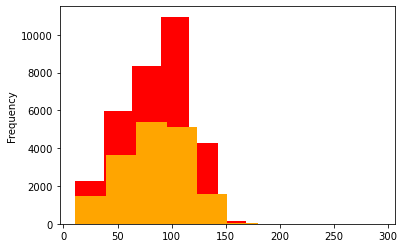

In [9]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'red', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [5]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

id  label                                              tweet  len
0   1      0   @user when a father is dysfunctional and is s...  102
1   2      0  @user @user thanks for #lyft credit i can't us...  122
2   3      0                                bihday your majesty   21
3   4      0  #model   i love u take with u all the time in ...   86
4   5      0             factsguide: society now    #motivation   39
5   6      0  [2/2] huge fan fare and big talking before the...  116
6   7      0   @user camping tomorrow @user @user @user @use...   74
7   8      0  the next school year is the year for exams.ð...  143
8   9      0  we won!!! love the land!!! #allin #cavs #champ...   87
9  10      0   @user @user welcome here !  i'm   it's so #gr...   50

In [44]:
train['len'].describe()

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: len, dtype: float64

In [45]:
train[train['len']==274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [11]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

In [6]:
train.groupby('len').describe()

id                                                                    \
    count          mean           std      min       25%      50%       75%   
len                                                                           
11    1.0  25196.000000           NaN  25196.0  25196.00  25196.0  25196.00   
12    8.0  16649.125000  10779.449130   3398.0   7951.25  16085.0  25410.00   
13    6.0  13621.833333   7392.675278   6226.0   8548.50  10800.5  19393.00   
14   24.0  15988.041667   9743.212842   2373.0   8001.50  13588.5  25883.75   
15   29.0  18358.896552   9883.169989   2742.0   8161.00  18626.0  27033.00   
..    ...           ...           ...      ...       ...      ...       ...   
199   1.0  11284.000000           NaN  11284.0  11284.00  11284.0  11284.00   
201   1.0  31486.000000           NaN  31486.0  31486.00  31486.0  31486.00   
203   1.0  18434.000000           NaN  18434.0  18434.00  18434.0  18434.00   
247   1.0  13460.000000           NaN  13460.0  13460.00  13460.0  13460.00   
274   1.0  19771.000000           NaN  19771.0  19771.00  19771.0  19771.00   

             label                                               
         max count      mean       std  min  25%  50%  75%  max  
len                                                              
11   25196.0   1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
12   31782.0   8.0  0.125000  0.353553  0.0  0.0  0.0  0.0  1.0  
13   23849.0   6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
14   30271.0  24.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
15   31482.0  29.0  0.206897  0.412251  0.0  0.0  0.0  0.0  1.0  
..       ...   ...       ...       ...  ...  ...  ...  ...  ...  
199  11284.0   1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
201  31486.0   1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
203  18434.0   1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
247  13460.0   1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
274  19771.0   1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  

[165 rows x 16 columns]

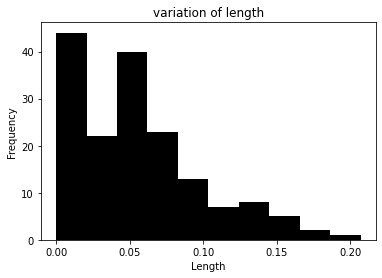

In [12]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

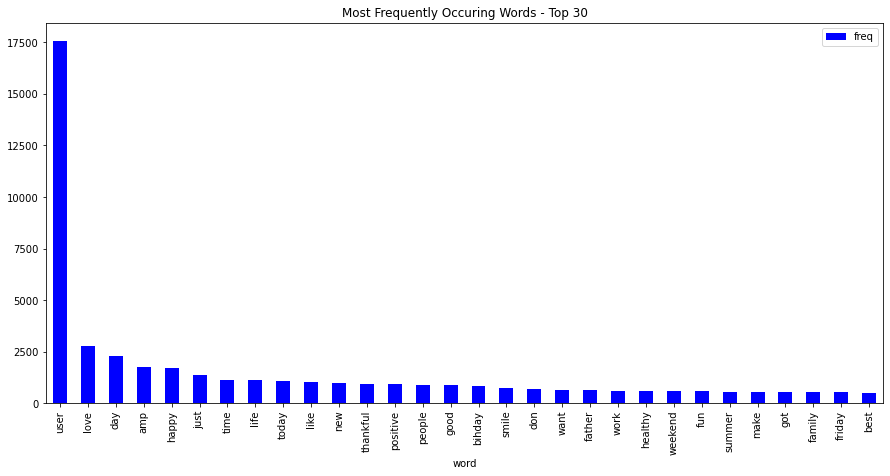

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


we are creating an image with .imshow(), the resampling of the image is done as the image pixel size and screen resolution doesn’t not match. This resampling is controlled with the interpolation argument to produce softer or crisper images as per our need. There are several types of interpolation available such as gaussian, quadric, bicubic.

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

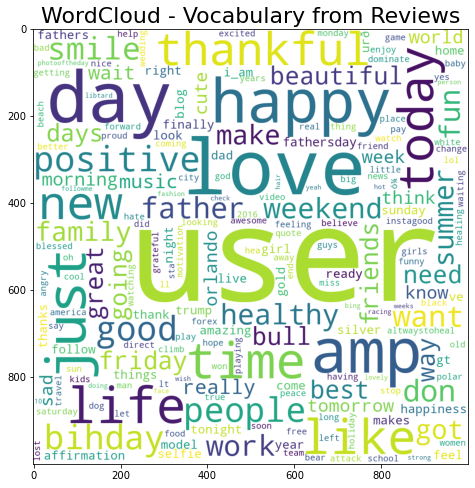

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

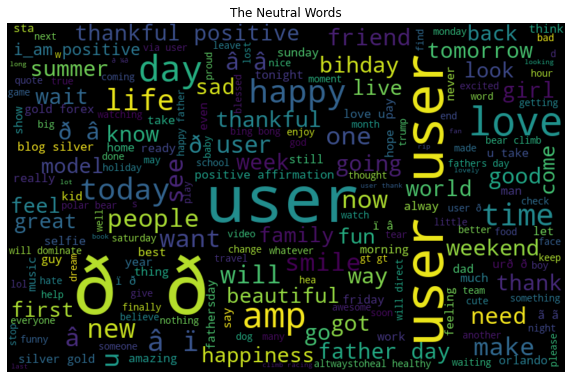

In [15]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


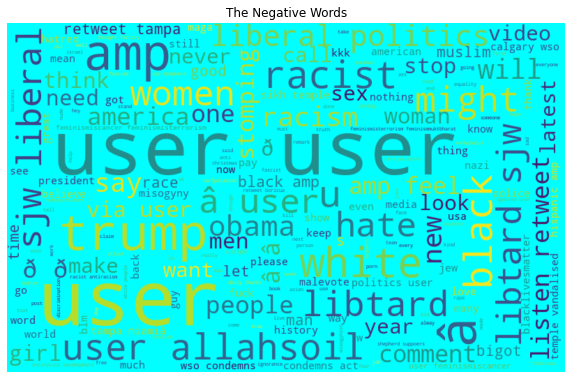

In [16]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [19]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [20]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

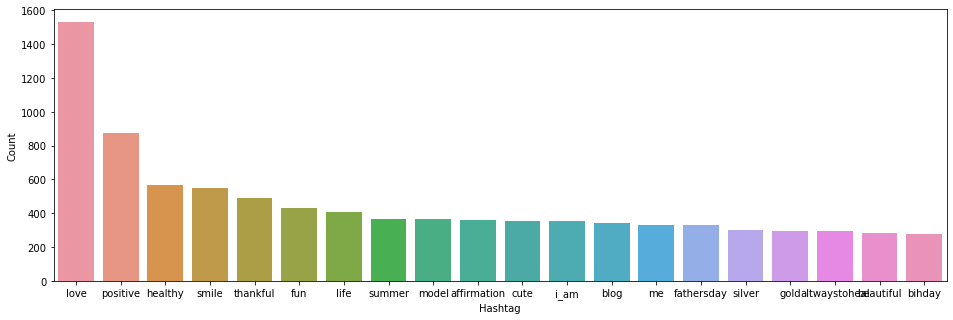

In [22]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

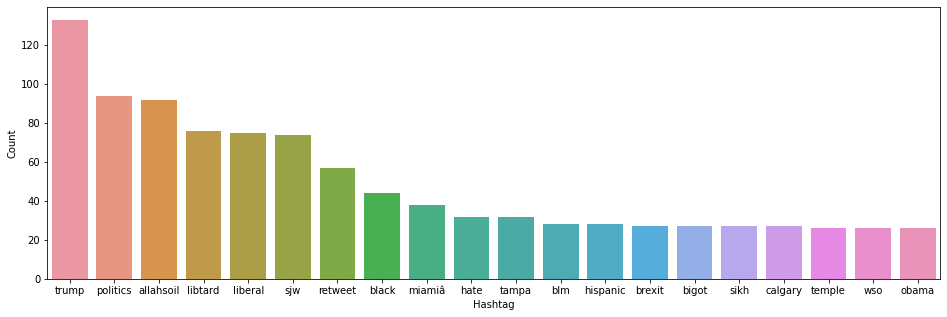

In [23]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [24]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

/home/mona/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


(6109808, 8411580)

In [25]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6727822422981262),
 ('#prosecco', 0.631844699382782),
 ('fluffy', 0.5914700627326965),
 ('#wanderlust', 0.5913546085357666),
 ('toes', 0.590802013874054),
 ('7!', 0.5907462239265442),
 ('sister!!', 0.5885739922523499),
 ('shopping!', 0.5874179005622864),
 ('#adidasler', 0.5858862996101379),
 ('willow', 0.5851418375968933)]

In [26]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7201187610626221),
 ('#merica', 0.7066284418106079),
 ('ways.', 0.7010388970375061),
 ('level.', 0.6955333352088928),
 ('ownership', 0.6951553225517273),
 ('politicizing', 0.6937242746353149),
 ('law.', 0.6884357333183289),
 ('targeted', 0.6883967518806458),
 ('intelligent', 0.6816226840019226),
 ('aol', 0.6814742684364319)]

In [27]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7061294913291931),
 ('"mytraining"', 0.7060538530349731),
 ('training"', 0.6854069828987122),
 ('app,', 0.6507237553596497),
 ('"my', 0.6004428267478943),
 ('ta', 0.5935642719268799),
 ('bees', 0.5925545692443848),
 ('app', 0.5798502564430237),
 ('ios', 0.5706661343574524),
 ('humans.', 0.5692329406738281)]

In [28]:
model_w2v.wv.most_similar(negative = "hate")

[('#apple', -0.011317772790789604),
 ('#games', -0.03871186450123787),
 ('stas', -0.042898356914520264),
 ('#fundraising', -0.051552675664424896),
 ('#yay', -0.052469003945589066),
 ('you?', -0.06141384690999985),
 ('us.', -0.06851943582296371),
 ('event!', -0.07054906338453293),
 ('#amwriting', -0.07093071192502975),
 ('hands', -0.07124880701303482)]

In [29]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

We use tqdm library to display the progress of our Python code till its execution

In [7]:
from tqdm import tqdm
for i in tqdm(range(20,20000000)):
  a = []
  a.append(i)

100%|██████████| 19999980/19999980 [00:09<00:00, 2036145.11it/s]


In [30]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [31]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /home/mona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
train_corpus = []

for i in range(0, 31962):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    review = review.lower()
    review = review.split()
   
  ps = PorterStemmer()
  
  # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
    review = ' '.join(review)
    train_corpus.append(review)

In [33]:
test_corpus = []

for i in range(0, 17197):
    review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
    review = review.lower()
    review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [34]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [35]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [36]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [37]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9529470654486297
F1 score : 0.6147540983606556
[[7315  117]
 [ 259  300]]


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


/home/mona/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_predTest = model.predict(x_test)

In [42]:
test['result'] = model.predict(x_test)

In [43]:
test.head(20)

id                                              tweet  len  result
0   31963  #studiolife #aislife #requires #passion #dedic...   90       0
1   31964   @user #white #supremacists want everyone to s...  101       0
2   31965  safe ways to heal your #acne!!    #altwaystohe...   71       0
3   31966  is the hp and the cursed child book up for res...  142       0
4   31967    3rd #bihday to my amazing, hilarious #nephew...   93       0
5   31968                        choose to be   :) #momtips    27       0
6   31969  something inside me dies ð¦ð¿â¨  eyes nes...   92       0
7   31970  #finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...   85       0
8   31971   @user @user @user i will never understand why...  108       1
9   31972  #delicious   #food #lovelife #capetown mannaep...   66       0
10  31973  1000dayswasted - narcosis infinite ep.. make m...   89       0
11  31974  one of the world's greatest spoing events   #l...   65       0
12  31975  half way through the website now and #allgoing...   57       0
13  31976  good food, good life , #enjoy and   ððð...  107       0
14  31977  i'll stand behind this #guncontrolplease   #se...   99       0
15  31978  i ate,i ate and i ate...ðð   #jamaisasth...   98       0
16  31979   @user got my @user limited edition rain or sh...   89       1
17  31980  &amp; #love &amp; #hugs &amp; #kisses too! how...   92       0
18  31981  ð­ðð #girls   #sun #fave @ london, uni...   58       0
19  31982  thought factory: bbc neutrality on right wing ...  110       0